### DSN AI Bootcamp Qualification Hackathon
Kowope Mart is a Nigerian-based retail company with a vision to provide quality goods, education and automobile services to its customers at affordable price and reduce if not eradicate charges on card payments and increase customer satisfaction with credit rewards that can be used within the Mall. To achieve this, the company has partnered with DSBank on co-branded credit card with additional functionality such that customers can request for loan, pay for goods even with zero-balance and then pay back within an agreed period of time. This innovative strategy has increased sales for the company. However, there has been recent cases of credit defaults and Kowope Mart will like to have a system that profiles customers who are worthy of the card with minimum if not zero risk of defaulting.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# To allow maximum display of rows and columns
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample = pd.read_csv('SampleSubmission.csv')

In [3]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


### Basic EDA

In [4]:
train['default_status'].value_counts()

no     42285
yes    13715
Name: default_status, dtype: int64

In [5]:
# Check for missing data
train.isnull().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [6]:
train['default_status'] = train['default_status'].replace({"yes":1, "no":0})

In [7]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,0


In [8]:
train.fillna(-9999999, inplace=True)
test.fillna(-9999999, inplace=True)

In [9]:
train.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,-9999999.00,-9999999.00,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,-9999999.0,1052.0,8.0000,2.0,-9999999.0,12.0,12.0,4.0,0.0,-9.999999e+06,-9999999.0,0.392854,2.02,0.711632,0.0,0.0,charge,-9.999999e+06,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,-9999999.0,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,-9.999999e+06,-9999999.0,0.314281,8.08,0.183584,-9999999.0,0.0,charge,3.498057e+02,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,-9999999.0,956940.0,-9999999.0,192944.0,1079864.0,-9999999.0,-9999999.0,0.0,16576457,22452691.0,-9999999.0,-9999999.0,-9999999.0,0.0,0.0,-9999999.000,-9999999.00,-9999999.00,-9999999.000,1597.5,4746.0,3164.0,60.0,15696.0,-9999999.0,14508.0,70.0,0.6666,0.0,-9999999.0,12.0,0.0,6.0,0.0,1.496805e+02,-9999999.0,0.162965,18.18,0.791136,0.0,0.0,charge,-9.999999e+06,1.513370,0.011640,1


In [10]:
corr_train = train.corr()

In [11]:
pd.options.display.max_rows = 999
corr_train['default_status'].sort_values(ascending=False)

default_status    1.000000
form_field11      0.248940
form_field40      0.114511
form_field31      0.106481
form_field2       0.073154
form_field36      0.031275
form_field14      0.008272
form_field38      0.004157
form_field5       0.004157
form_field4       0.004157
form_field3       0.004156
form_field49      0.004156
form_field20      0.004156
form_field34      0.004156
form_field29      0.001627
form_field19     -0.000097
form_field43     -0.002028
form_field28     -0.003263
form_field42     -0.010385
form_field33     -0.019181
form_field41     -0.022153
form_field35     -0.031690
form_field23     -0.045615
form_field30     -0.055623
form_field1      -0.064350
form_field46     -0.073663
form_field22     -0.089150
form_field48     -0.099327
form_field13     -0.104310
form_field44     -0.112228
form_field15     -0.117681
form_field50     -0.121536
form_field39     -0.129072
form_field27     -0.138463
form_field7      -0.139719
form_field26     -0.141957
form_field21     -0.160028
f

In [12]:
import datasist as ds

In [13]:
ylabel = train.default_status
df_train = train.drop(columns=['default_status'])

all_data, ntrain, ntest = ds.structdata.join_train_and_test(df_train, test)

In [14]:
all_data.shape

(80000, 51)

In [15]:
ds.structdata.display_missing(all_data)

,features,missing_counts,missing_percent
0,Applicant_ID,0,0.0
1,form_field1,0,0.0
2,form_field2,0,0.0
3,form_field3,0,0.0
4,form_field4,0,0.0
5,form_field5,0,0.0
6,form_field6,0,0.0
7,form_field7,0,0.0
8,form_field8,0,0.0
9,form_field9,0,0.0


### Feature engineering

In [16]:
all_data['form_field51'] = all_data['form_field3'] + all_data['form_field4'] + all_data['form_field5']
all_data['form_field52'] = all_data['form_field32'] + all_data['form_field33']
all_data['form_field53'] = all_data['form_field14'] + all_data['form_field15']
all_data['form_field54'] = all_data['form_field29'] / 4
all_data['form_field55'] = all_data['form_field30'] / 4
all_data['form_field56'] = all_data['form_field31'] / 4

In [17]:
corr_all_data = all_data.corr()

In [18]:
pd.options.display.max_rows = 999
corr_all_data

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,form_field51,form_field52,form_field53,form_field54,form_field55,form_field56
form_field1,1.000000,0.090485,0.363649,0.363650,0.363650,0.333756,0.163851,0.297202,0.186195,0.108814,-0.094502,0.309596,0.136002,-0.019352,0.056355,0.349273,0.378476,0.381633,0.032395,0.364015,0.312894,0.232314,0.174605,0.361732,0.453969,0.453662,0.409027,0.364144,0.366114,0.199427,0.124381,0.453962,0.082967,0.364014,0.217429,0.305378,0.453945,0.364015,0.585674,0.112209,0.141392,0.429914,0.374359,0.542233,0.175617,0.273455,0.231807,0.363650,0.215494,0.363650,0.432663,-0.017342,0.366114,0.199427,0.124381
form_field2,0.090485,1.000000,0.074331,0.074331,0.074331,0.006698,-0.023951,-0.020457,-0.018356,-0.028845,0.056548,0.040044,-0.003594,-0.004436,-0.006425,0.048420,0.049003,0.049526,0.005027,0.074837,0.055087,0.197880,0.178689,0.049899,0.058736,0.078763,0.077051,0.070542,0.073506,0.100145,0.053985,0.058838,0.012590,0.074837,0.205138,0.084716,0.058863,0.074839,0.075534,0.053691,0.111504,0.074286,0.071975,0.085558,-0.023040,0.099287,0.181026,0.074331,0.337752,0.074331,0.056873,-0.004662,0.073506,0.100145,0.053985
form_field3,0.363649,0.074331,1.000000,1.000000,1.000000,0.137196,0.066988,0.119931,0.075849,0.066058,0.061044,0.130079,0.052416,-0.018748,0.015046,0.144689,0.159731,0.166821,0.089076,0.998997,0.126666,0.104922,0.078894,0.142723,0.243150,0.203014,0.178509,0.998419,0.998923,0.086845,0.051633,0.243150,0.136489,0.998997,0.094705,0.409470,0.243150,0.998997,0.277791,0.041919,0.054179,0.483858,0.781042,0.242471,0.070269,0.125781,0.099368,1.000000,0.098173,1.000000,0.271631,-0.018204,0.998923,0.086845,0.051633
form_field4,0.363650,0.074331,1.000000,1.000000,1.000000,0.137196,0.066988,0.119931,0.075849,0.066058,0.061044,0.130080,0.052416,-0.018748,0.015046,0.144689,0.159731,0.166821,0.089076,0.998997,0.126666,0.104922,0.078894,0.142723,0.243150,0.203014,0.178509,0.998419,0.998923,0.086846,0.051633,0.243150,0.136489,0.998997,0.094705,0.409470,0.243150,0.998997,0.277791,0.041919,0.054179,0.483858,0.781042,0.242472,0.070269,0.125782,0.099368,1.000000,0.098173,1.000000,0.271631,-0.018204,0.998923,0.086846,0.051633
form_field5,0.363650,0.074331,1.000000,1.000000,1.000000,0.137195,0.066987,0.119930,0.075848,0.066057,0.061046,0.130078,0.052416,-0.018748,0.015046,0.144687,0.159729,0.166820,0.089076,0.998997,0.126665,0.104921,0.078893,0.142722,0.243149,0.203013,0.178508,0.998419,0.998923,0.086844,0.051637,0.243149,0.136489,0.998997,0.094704,0.409470,0.243149,0.998997,0.277790,0.041921,0.054179,0.483859,0.781043,0.242471,0.070268,0.125781,0.099367,1.000000,0.098173,1.000000,0.271630,-0.018204,0.998923,0.086844,0.051637
form_field6,0.333756,0.006698,0.137196,0.137196,0.137195,1.000000,0.264588,0.882272,0.409258,0.254101,-0.386758,0.648271,0.228996,-0.010659,0.148205,0.948075,0.858840,0.822330,0.012226,0.137335,0.804854,0.527609,0.418854,0.755948,0.564324,0.586396,0.649131,0.147910,0.140503,0.119993,-0.077316,0.564317,0.052363,0.137335,0.487321,0.089830,0.564249,0.137335,0.493886,-0.056559,0.120532,0.118835,0.103973,0.485401,0.253300,0.147299,0.541163,0.137197,0.316908,0.137196,0.515837,-0.005396,0.140503,0.119993,-0.077316
form_field7,0.163851,-0.023951,0.066988,0.066988,0.066987,0.264588,1.000000,0.364294,0.361523,0.888935,-0.176264,0.245916,0.333995,-0.000717,0.185529,0.223413,0.226386,0.230536,0.005967,0.067056,0.200804,0.100819,0.048178,0.217

In [19]:
all_data.head(2)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,form_field51,form_field52,form_field53,form_field54,form_field55,form_field56
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.0,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,-9999999.00,-9999999.00,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,-9999999.0,1052.0,8.0,2.0,-9999999.0,12.0,12.0,4.0,0.0,-9999999.0,-9999999.0,0.392854,2.02,0.711632,0.0,0.0,charge,-9.999999e+06,1.129518,0.044335,1.6560,1060.0,208556904.0,4266.00,1490.5,-2499999.75
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.0,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,-9999999.0,2554.0,17.5,0.0,0.0,16.0,24.0,8.0,0.0,-9999999.0,-9999999.0,0.314281,8.08,0.183584,-9999999.0,0.0,charge,3.498057e+02,1.620483,0.322436,0.2342,2571.5,73311329.0,3353.25,1445.0,-2499999.75


In [20]:
all_data.drop(columns=['Applicant_ID'], inplace=True)

In [21]:
import category_encoders as ce

enc = ce.OrdinalEncoder()
all_data = enc.fit_transform(all_data)

In [22]:
all_data.head(3)

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,form_field51,form_field52,form_field53,form_field54,form_field55,form_field56
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,-9999999.00,-9999999.00,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,-9999999.0,1052.0,8.0000,2.0,-9999999.0,12.0,12.0,4.0,0.0,-9.999999e+06,-9999999.0,0.392854,2.02,0.711632,0.0,0.0,1,-9.999999e+06,1.129518,0.044335,1.6560,1060.0000,208556904.0,4266.00,1490.50,-2499999.75
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,-9999999.0,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,-9.999999e+06,-9999999.0,0.314281,8.08,0.183584,-9999999.0,0.0,1,3.498057e+02,1.620483,0.322436,0.2342,2571.5000,73311329.0,3353.25,1445.00,-2499999.75
2,3276.0,0.53845,3.1510,0.0,6.282,-9999999.0,956940.0,-9999999.0,192944.0,1079864.0,-9999999.0,-9999999.0,0.0,16576457,22452691.0,-9999999.0,-9999999.0,-9999999.0,0.0,0.0,-9999999.000,-9999999.00,-9999999.00,-9999999.000,1597.5,4746.0,3164.0,60.0,15696.0,-9999999.0,14508.0,70.0,0.6666,0.0,-9999999.0,12.0,0.0,6.0,0.0,1.496805e+02,-9999999.0,0.162965,18.18,0.791136,0.0,0.0,1,-9.999999e+06,1.513370,0.011640,9.4330,70.6666,39029148.0,3924.00,-2499999.75,3627.00


In [23]:
#split new train and test
train = all_data[:ntrain]
test = all_data[ntrain:]

print(f"Shape of train {train.shape}")
print(f"Shape of test {test.shape}")

Shape of train (56000, 56)
Shape of test (24000, 56)


### Model

In [24]:
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import catboost as cat_
import lightgbm as lgb

In [25]:
class func() :   
    def __init__(self, train, label, test, model, model_type, random_state):
        self.train, self.label, self.test = train, label, test
        self.model, self.model_type = model, model_type
        self.random_state = random_state
        
        assert self.model_type in ('catboost', 'xgboost', 'lgbm'), 'Incorrect model_type'
    def __call__(self, plot = True):
        return self.fit(plot)

    def fit(self, plot):
        def catboost_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=500,
                           verbose=50,use_best_model=True)
            x_test_predict = self.model.predict_proba(X_test)[:,1]
            x_train_predict = self.model.predict_proba(X_train)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test)[:,1]
            return x_test_predict, x_train_predict

        def xgboost_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric="auc",
                           eval_set=[(X_test, y_test)], verbose = True)
            x_test_predict = self.model.predict_proba(X_test, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            x_train_predict = self.model.predict_proba(X_train, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test, ntree_limit = self.model.get_booster().best_ntree_limit)[:,1]
            return x_test_predict, x_train_predict

        def lgbm_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric="auc",
                           eval_set=[(X_test, y_test)], verbose = True)
            x_test_predict = self.model.predict_proba(X_test, num_iteration = self.model.best_iteration_)[:,1]
            x_train_predict = self.model.predict_proba(X_train, num_iteration = self.model.best_iteration_)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test, num_iteration = self.model.best_iteration_)[:,1]
            return x_test_predict, x_train_predict


        self.val_p = np.zeros(self.train.shape[0])
        mean_val = []
        mean_train = []
        self.test_p = np.zeros(self.test.shape[0])
        splits = 5
        kf = StratifiedKFold(n_splits = splits)
        for fold_count, (train_index, test_index) in enumerate(kf.split(self.train, self.label)):
            X_train,X_test = self.train.iloc[train_index],self.train.iloc[test_index]
            y_train,y_test = self.label.iloc[train_index],self.label.iloc[test_index]

            print(f"================================Fold{fold_count+1}====================================")
            if self.model_type == 'catboost': x_test_predict, x_train_predict = catboost_fit(X_train, X_test, y_train, y_test)
            elif self.model_type == 'xgboost': x_test_predict, x_train_predict = xgboost_fit(X_train, X_test, y_train, y_test)
            elif self.model_type == 'lgbm': x_test_predict, x_train_predict = lgbm_fit(X_train, X_test, y_train, y_test)

            print('\nValidation scores', roc_auc_score(y_test, x_test_predict), log_loss(y_test, x_test_predict))
            print('Training scores', roc_auc_score(y_train, x_train_predict), log_loss(y_train, x_train_predict))
            mean_val.append(roc_auc_score(y_test, x_test_predict))
            mean_train.append(roc_auc_score(y_train, x_train_predict))

        if plot:
            feat_imp = pd.DataFrame(sorted(zip(self.model.feature_importances_,self.train.columns)), columns=['Value','Feature'])
            plt.figure(figsize=(30,25))
            sns.barplot(x="Value", y="Feature", data=feat_imp.sort_values(by="Value", ascending=False))
            plt.ylabel('Feature Importance Score')
            plt.show()
        print(np.mean(mean_val), np.mean(mean_train), np.std(mean_val))
        return self.val_p, self.test_p/splits, self.model

================================Fold1====================================
0:	test: 0.8015353	best: 0.8015353 (0)	total: 200ms	remaining: 16m 39s
50:	test: 0.8281125	best: 0.8281125 (50)	total: 3.45s	remaining: 5m 34s
100:	test: 0.8316572	best: 0.8316572 (100)	total: 6.54s	remaining: 5m 17s
150:	test: 0.8335836	best: 0.8335836 (150)	total: 9.77s	remaining: 5m 13s
200:	test: 0.8351943	best: 0.8351943 (200)	total: 13.2s	remaining: 5m 14s
250:	test: 0.8360911	best: 0.8360911 (250)	total: 16.4s	remaining: 5m 11s
300:	test: 0.8368408	best: 0.8368408 (300)	total: 19.5s	remaining: 5m 3s
350:	test: 0.8373601	best: 0.8373601 (350)	total: 22.6s	remaining: 4m 58s
400:	test: 0.8377086	best: 0.8377154 (399)	total: 26.2s	remaining: 5m
450:	test: 0.8379165	best: 0.8379165 (450)	total: 29.6s	remaining: 4m 58s
500:	test: 0.8382834	best: 0.8382894 (499)	total: 33.1s	remaining: 4m 57s
550:	test: 0.8386169	best: 0.8386169 (550)	total: 36.8s	remaining: 4m 57s
600:	test: 0.8390101	best: 0.8390142 (598)	total

0:	test: 0.7900103	best: 0.7900103 (0)	total: 76ms	remaining: 6m 19s
50:	test: 0.8181330	best: 0.8181330 (50)	total: 5.61s	remaining: 9m 4s
100:	test: 0.8226962	best: 0.8226962 (100)	total: 9.37s	remaining: 7m 34s
150:	test: 0.8252727	best: 0.8252814 (149)	total: 12.8s	remaining: 6m 51s
200:	test: 0.8269613	best: 0.8269613 (200)	total: 16.5s	remaining: 6m 34s
250:	test: 0.8280250	best: 0.8280308 (249)	total: 20.2s	remaining: 6m 22s
300:	test: 0.8291097	best: 0.8291097 (300)	total: 23.7s	remaining: 6m 9s
350:	test: 0.8297572	best: 0.8297572 (350)	total: 26.8s	remaining: 5m 54s
400:	test: 0.8302428	best: 0.8302428 (400)	total: 30.3s	remaining: 5m 46s
450:	test: 0.8307142	best: 0.8307142 (450)	total: 33.6s	remaining: 5m 38s
500:	test: 0.8310821	best: 0.8310821 (500)	total: 36.7s	remaining: 5m 29s
550:	test: 0.8313456	best: 0.8313456 (550)	total: 39.8s	remaining: 5m 21s
600:	test: 0.8314975	best: 0.8315237 (588)	total: 42.9s	remaining: 5m 14s
650:	test: 0.8315944	best: 0.8316250 (644)	tota

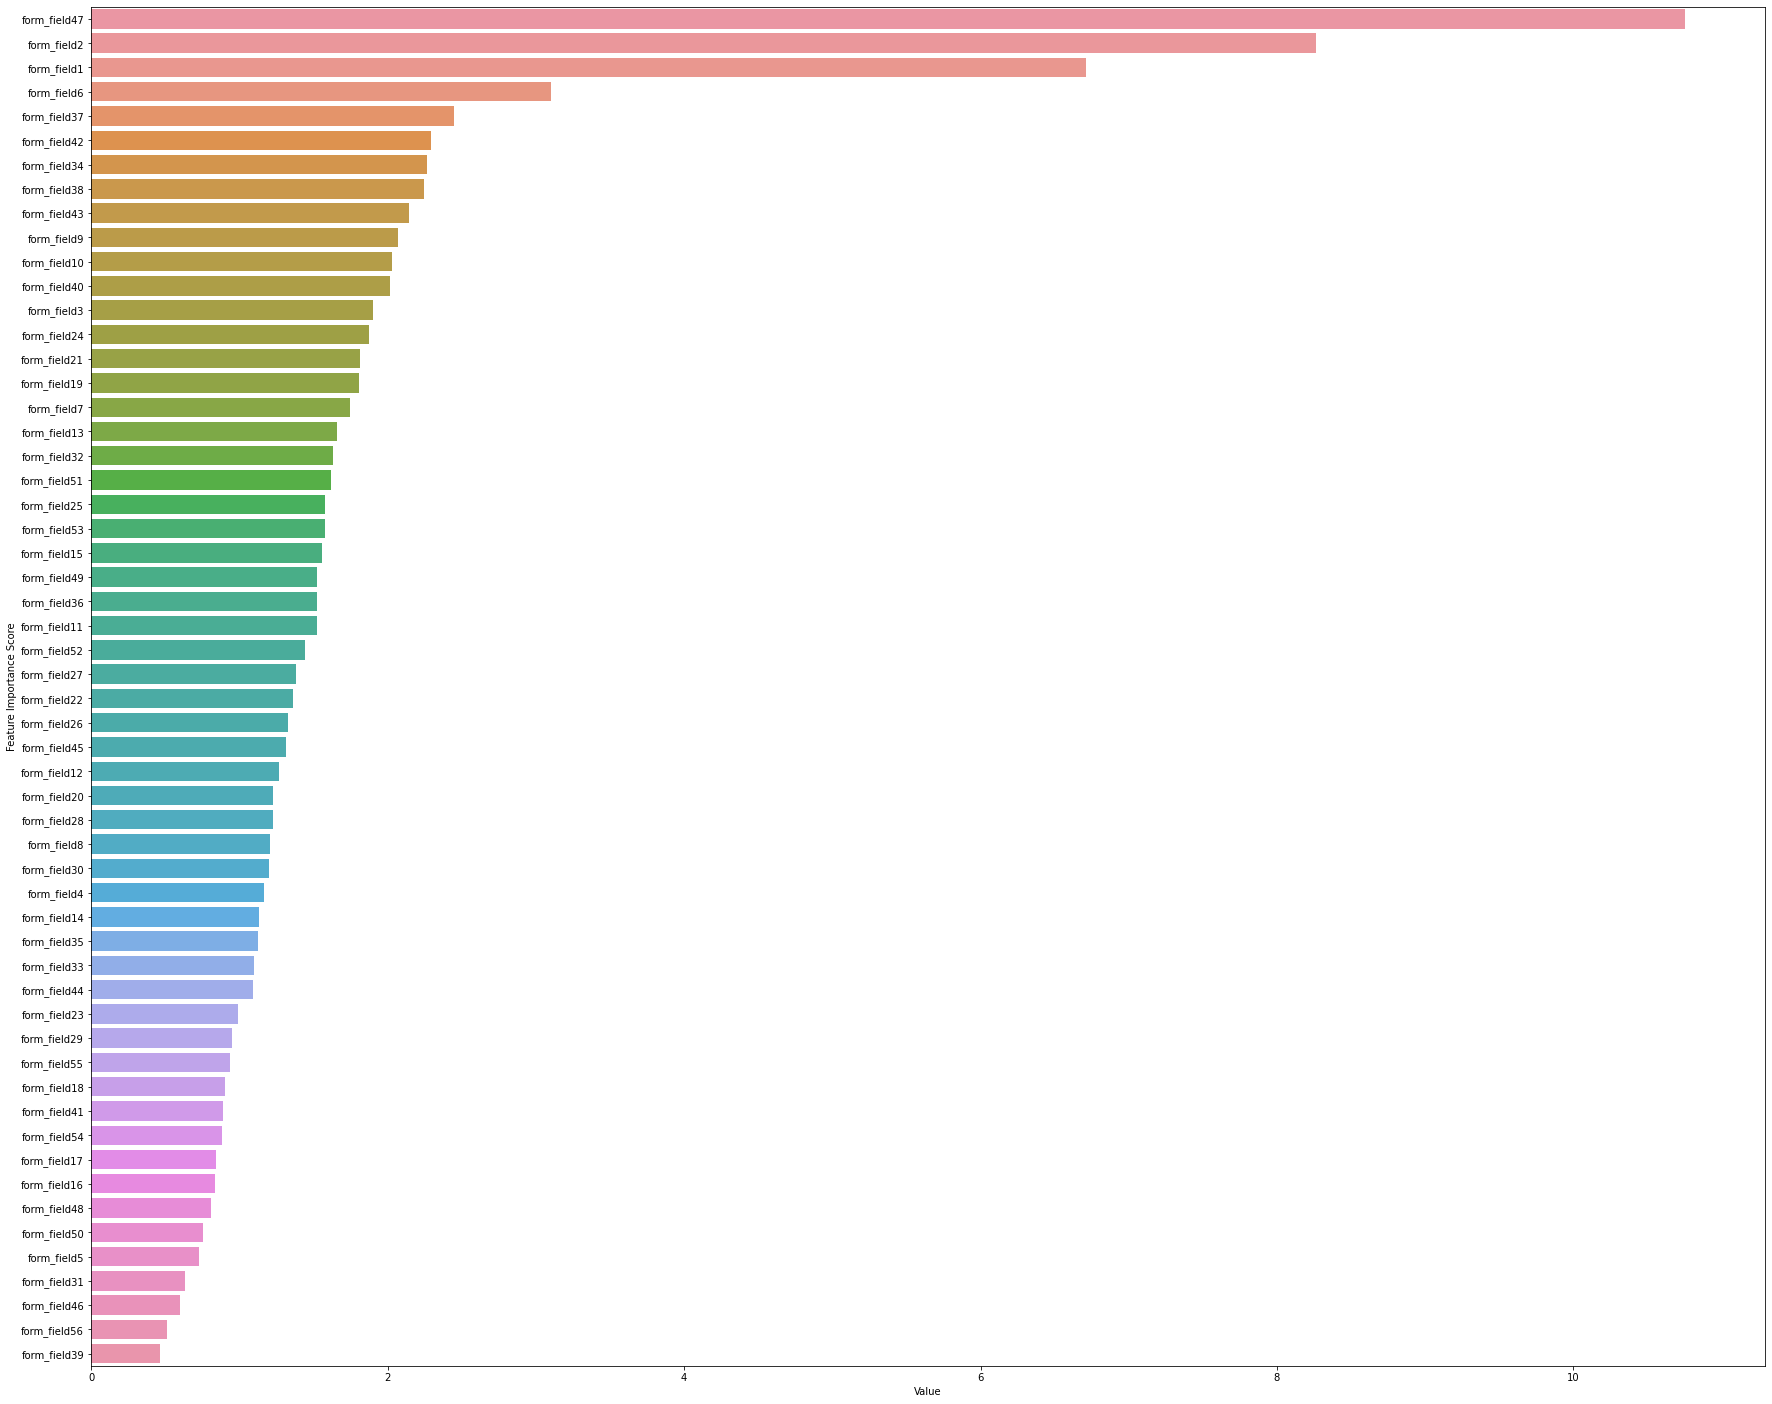

0.8404287073234584 0.9038780066158708 0.006005592183597884


In [26]:
catboost = cat_.CatBoostClassifier(iterations=5000, learning_rate=0.02, l2_leaf_reg=3.5, depth=8, rsm=0.98, loss_function= 'Logloss', eval_metric='AUC')

func_= func(train, ylabel, test, catboost, 'catboost', 600)
val_p1, test_p1, model1 = func_()

================================Fold1====================================
0:	learn: 0.6760107	test: 0.6763774	best: 0.6763774 (0)	total: 55.5ms	remaining: 9m 15s
50:	learn: 0.4362522	test: 0.4388261	best: 0.4388261 (50)	total: 1.53s	remaining: 4m 58s
100:	learn: 0.4163699	test: 0.4203376	best: 0.4203376 (100)	total: 2.91s	remaining: 4m 45s
150:	learn: 0.4105149	test: 0.4154692	best: 0.4154692 (150)	total: 4.32s	remaining: 4m 41s
200:	learn: 0.4071629	test: 0.4131313	best: 0.4131313 (200)	total: 5.84s	remaining: 4m 44s
250:	learn: 0.4048616	test: 0.4115683	best: 0.4115683 (250)	total: 7.39s	remaining: 4m 47s
300:	learn: 0.4028065	test: 0.4103022	best: 0.4103022 (300)	total: 8.79s	remaining: 4m 43s
350:	learn: 0.4011665	test: 0.4095214	best: 0.4095214 (350)	total: 10.3s	remaining: 4m 43s
400:	learn: 0.3996076	test: 0.4089219	best: 0.4089219 (400)	total: 11.8s	remaining: 4m 42s
450:	learn: 0.3980541	test: 0.4084078	best: 0.4084078 (450)	total: 13.3s	remaining: 4m 40s
500:	learn: 0.3968106

750:	learn: 0.3910975	test: 0.4089342	best: 0.4089340 (748)	total: 23.6s	remaining: 4m 51s
800:	learn: 0.3905079	test: 0.4088219	best: 0.4088219 (800)	total: 25s	remaining: 4m 47s
850:	learn: 0.3900074	test: 0.4087989	best: 0.4087926 (848)	total: 26.4s	remaining: 4m 43s
900:	learn: 0.3895799	test: 0.4087147	best: 0.4087147 (900)	total: 28s	remaining: 4m 42s
950:	learn: 0.3889892	test: 0.4086731	best: 0.4086731 (950)	total: 29.7s	remaining: 4m 42s
1000:	learn: 0.3883772	test: 0.4085665	best: 0.4085665 (1000)	total: 31.2s	remaining: 4m 40s
1050:	learn: 0.3877917	test: 0.4084969	best: 0.4084869 (1046)	total: 32.6s	remaining: 4m 37s
1100:	learn: 0.3872706	test: 0.4084834	best: 0.4084749 (1085)	total: 34.2s	remaining: 4m 36s
1150:	learn: 0.3868555	test: 0.4084351	best: 0.4084351 (1150)	total: 35.5s	remaining: 4m 33s
1200:	learn: 0.3861722	test: 0.4083116	best: 0.4083085 (1199)	total: 37s	remaining: 4m 31s
1250:	learn: 0.3855390	test: 0.4082781	best: 0.4082781 (1250)	total: 38.4s	remaining: 

2900:	learn: 0.3715859	test: 0.4035004	best: 0.4033789 (2474)	total: 1m 28s	remaining: 3m 36s
2950:	learn: 0.3712592	test: 0.4035208	best: 0.4033789 (2474)	total: 1m 30s	remaining: 3m 35s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.4033789338
bestIteration = 2474

Shrink model to first 2475 iterations.

Validation scores 0.8433217799585826 0.4033789337978701
Training scores 0.8694067829617016 0.37451642976286403
================================Fold4====================================
0:	learn: 0.6756522	test: 0.6764698	best: 0.6764698 (0)	total: 38.9ms	remaining: 6m 29s
50:	learn: 0.4338525	test: 0.4443720	best: 0.4443720 (50)	total: 1.61s	remaining: 5m 15s
100:	learn: 0.4145674	test: 0.4266873	best: 0.4266873 (100)	total: 3.33s	remaining: 5m 26s
150:	learn: 0.4084435	test: 0.4222000	best: 0.4222000 (150)	total: 4.88s	remaining: 5m 18s
200:	learn: 0.4052562	test: 0.4201575	best: 0.4201575 (200)	total: 6.57s	remaining: 5m 20s
250:	learn: 0.4028537	test: 0.41871

950:	learn: 0.3947968	test: 0.3993540	best: 0.3993540 (950)	total: 31.1s	remaining: 4m 55s
1000:	learn: 0.3942695	test: 0.3993138	best: 0.3992969 (995)	total: 32.6s	remaining: 4m 53s
1050:	learn: 0.3937344	test: 0.3992361	best: 0.3992361 (1050)	total: 34.3s	remaining: 4m 52s
1100:	learn: 0.3930449	test: 0.3991653	best: 0.3991648 (1099)	total: 36.2s	remaining: 4m 52s
1150:	learn: 0.3925169	test: 0.3992319	best: 0.3991648 (1099)	total: 37.8s	remaining: 4m 50s
1200:	learn: 0.3918423	test: 0.3991565	best: 0.3991565 (1200)	total: 39.3s	remaining: 4m 47s
1250:	learn: 0.3912358	test: 0.3990555	best: 0.3990537 (1247)	total: 40.8s	remaining: 4m 45s
1300:	learn: 0.3908432	test: 0.3990545	best: 0.3990445 (1298)	total: 42.2s	remaining: 4m 42s
1350:	learn: 0.3901654	test: 0.3990474	best: 0.3990280 (1309)	total: 43.8s	remaining: 4m 40s
1400:	learn: 0.3894907	test: 0.3990117	best: 0.3990066 (1392)	total: 45.3s	remaining: 4m 37s
1450:	learn: 0.3889168	test: 0.3989995	best: 0.3989846 (1422)	total: 47.1

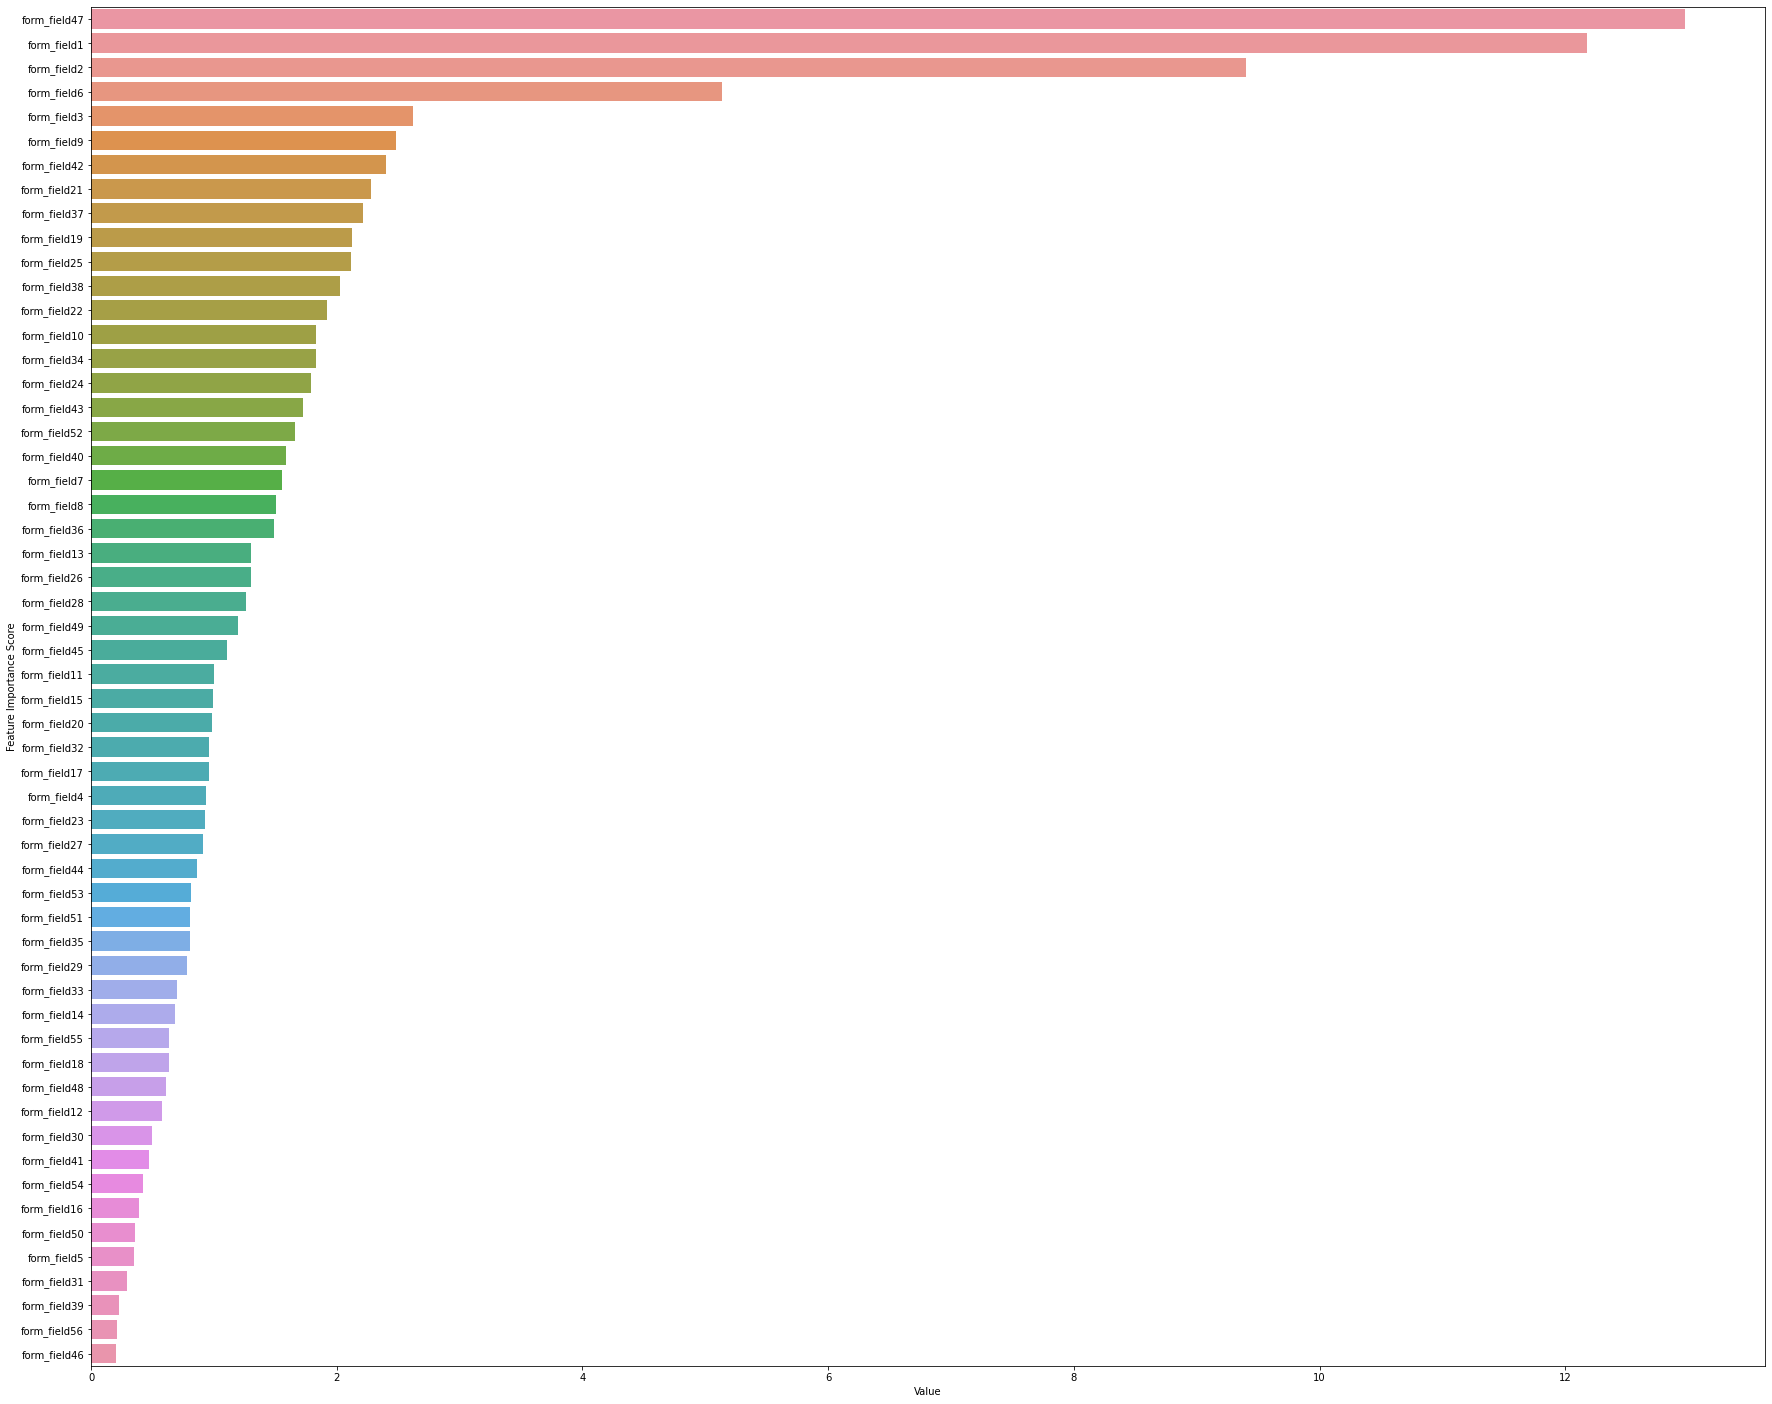

0.840632698684443 0.867432619288131 0.0056916005771623784


In [27]:
catboost = cat_.CatBoostClassifier(n_estimators=10000, max_depth=6, eval_metric='Logloss', reg_lambda = 370)

func_= func(train, ylabel, test, catboost, 'catboost', 1000)
val_p2, test_p2, model2 = func_()

================================Fold1====================================
[10:10:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.73545
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.79772
[2]	validation_0-auc:0.80689
[3]	validation_0-auc:0.81549
[4]	validation_0-auc:0.81723
[5]	validation_0-auc:0.82027
[6]	validation_0-auc:0.82079
[7]	validation_0-auc:0.82206
[8]	validation_0-auc:0.82277
[9]	validation_0-auc:0.82371
[10]	validation_0-auc:0.82439
[11]	validation_0-auc:0.82508
[12]	validation_0-auc:0.82569
[13]	validation_0-auc:0.82650
[14]	validation_0-auc:0.82700
[15]	validation_0-auc:0.82708
[16]

[21]	validation_0-auc:0.82302
[22]	validation_0-auc:0.82327
[23]	validation_0-auc:0.82360
[24]	validation_0-auc:0.82386
[25]	validation_0-auc:0.82381
[26]	validation_0-auc:0.82429
[27]	validation_0-auc:0.82416
[28]	validation_0-auc:0.82384
[29]	validation_0-auc:0.82398
[30]	validation_0-auc:0.82385
[31]	validation_0-auc:0.82384
[32]	validation_0-auc:0.82406
[33]	validation_0-auc:0.82434
[34]	validation_0-auc:0.82394
[35]	validation_0-auc:0.82413
[36]	validation_0-auc:0.82371
[37]	validation_0-auc:0.82352
[38]	validation_0-auc:0.82323
[39]	validation_0-auc:0.82288
[40]	validation_0-auc:0.82310
[41]	validation_0-auc:0.82310
[42]	validation_0-auc:0.82298
[43]	validation_0-auc:0.82265
[44]	validation_0-auc:0.82290
[45]	validation_0-auc:0.82267
[46]	validation_0-auc:0.82259
[47]	validation_0-auc:0.82263
[48]	validation_0-auc:0.82279
[49]	validation_0-auc:0.82256
[50]	validation_0-auc:0.82227
[51]	validation_0-auc:0.82217
[52]	validation_0-auc:0.82189
[53]	validation_0-auc:0.82203
[54]	valid

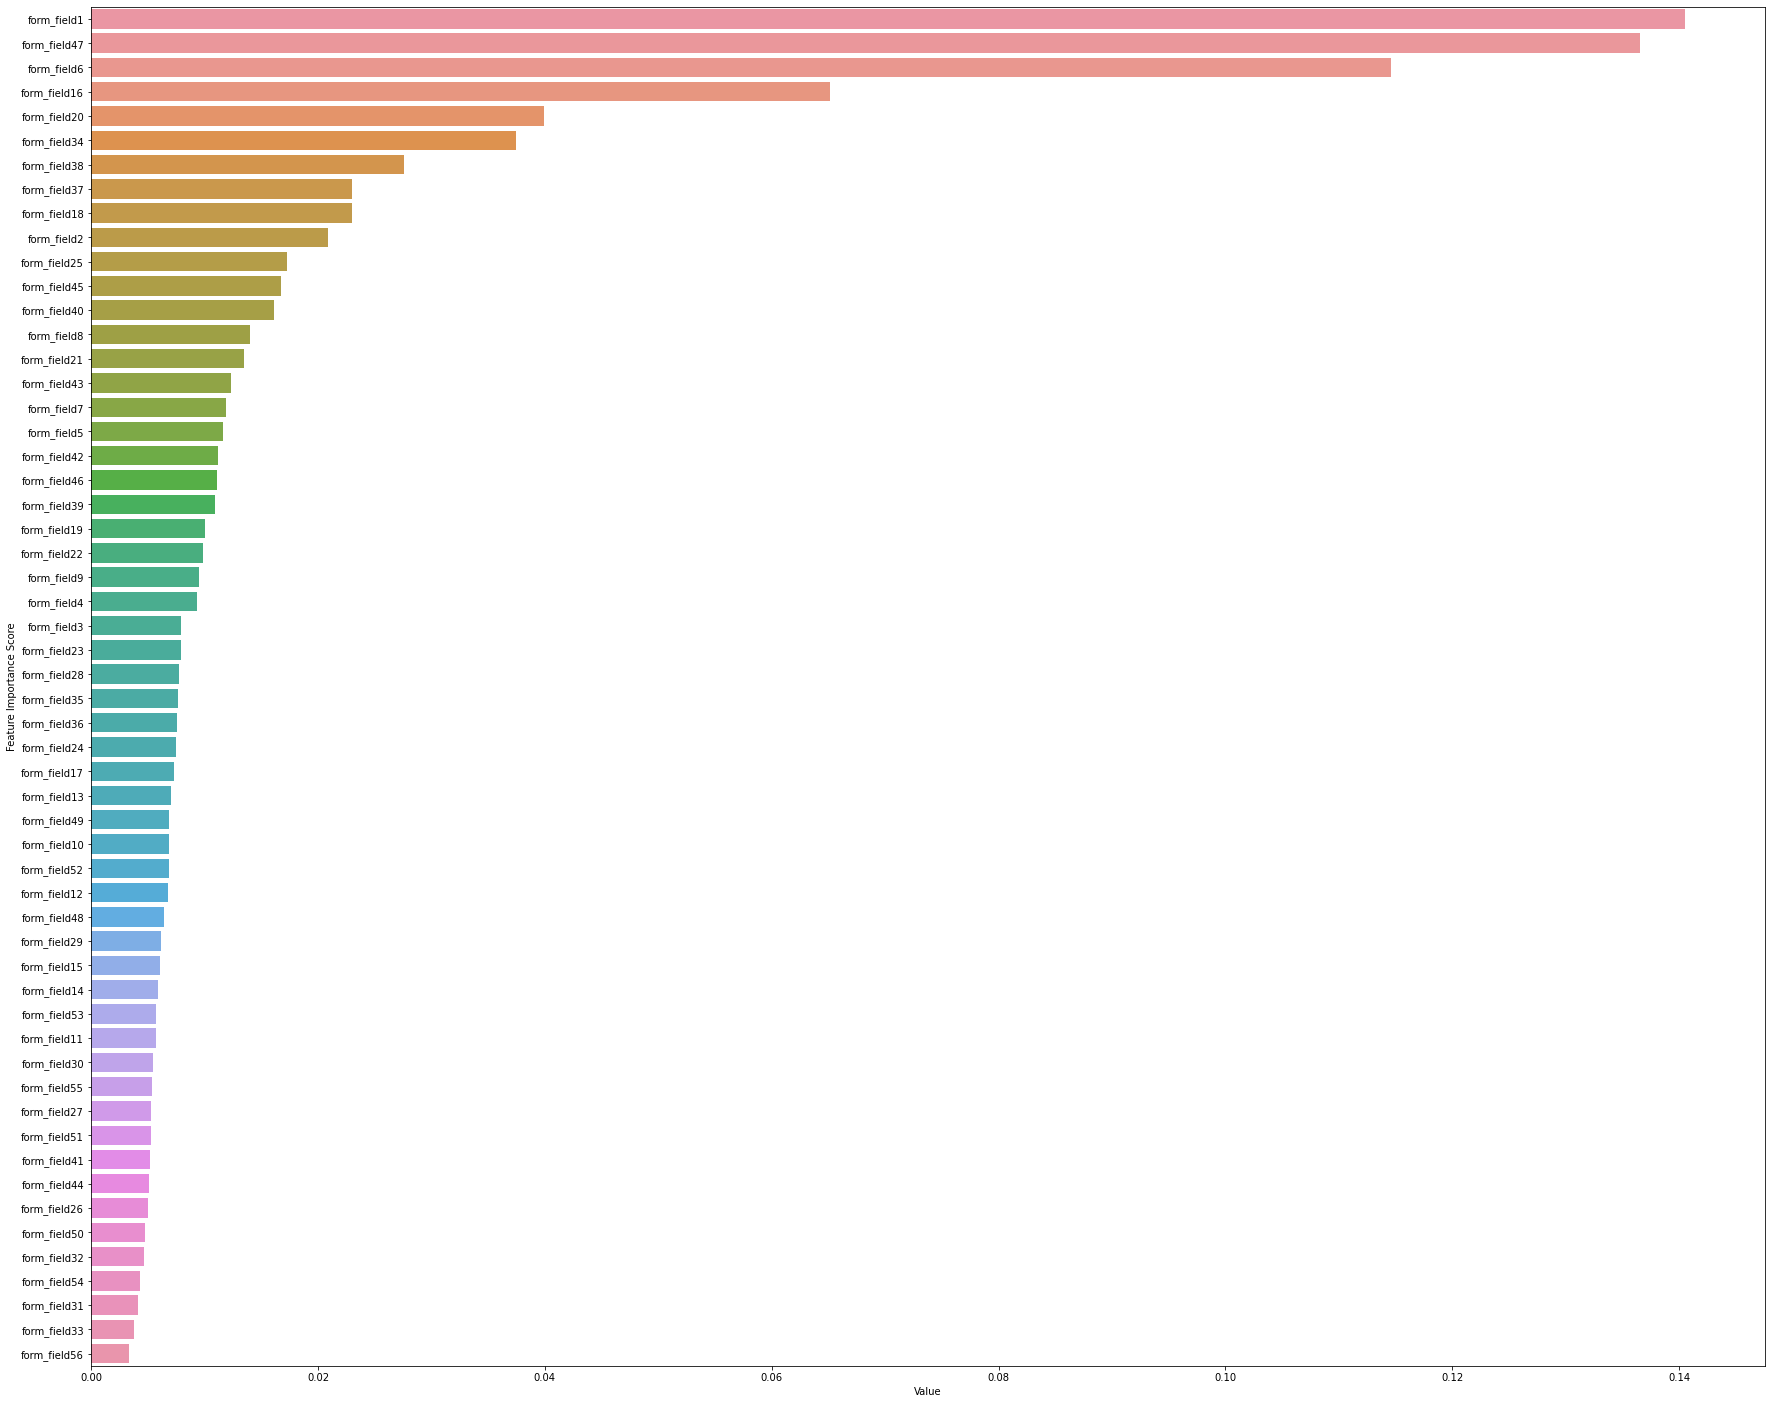

0.8311271995910257 0.8699255912294364 0.005685508326507685


In [28]:
xgboost = xgb.XGBClassifier(objective ='binary:logistic', 
                          eta = 0.99,
                          max_depth = 6, 
                          n_estimators = 5000,
                          reg_lambda = 500,
                          sub_sample = 0.8,
                          colsample_bytree = 0.8)

func_= func(train, ylabel, test, xgboost, 'xgboost', 1000)
val_p3, test_p3, model3 = func_()

================================Fold1====================================
[0]	validation_0-auc:0.80614
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.81276
[2]	validation_0-auc:0.81534
[3]	validation_0-auc:0.81659
[4]	validation_0-auc:0.81847
[5]	validation_0-auc:0.81866
[6]	validation_0-auc:0.81887
[7]	validation_0-auc:0.81999
[8]	validation_0-auc:0.82073
[9]	validation_0-auc:0.82135
[10]	validation_0-auc:0.82186
[11]	validation_0-auc:0.82242
[12]	validation_0-auc:0.82301
[13]	validation_0-auc:0.82337
[14]	validation_0-auc:0.82381
[15]	validation_0-auc:0.82389
[16]	validation_0-auc:0.82444
[17]	validation_0-auc:0.82495
[18]	validation_0-auc:0.82508
[19]	validation_0-auc:0.82555
[20]	validation_0-auc:0.82554
[21]	validation_0-auc:0.82597
[22]	validation_0-auc:0.82647
[23]	validation_0-auc:0.82690
[24]	validation_0-auc:0.82710
[25]	validation_0-auc:0.82749
[26]	validation_0-auc:0.82788
[27]	validation_0-auc:0.82824
[28]	validation_0-auc:0.82856
[2

[109]	validation_0-auc:0.83288
[110]	validation_0-auc:0.83283
[111]	validation_0-auc:0.83287
[112]	validation_0-auc:0.83287
[113]	validation_0-auc:0.83281
[114]	validation_0-auc:0.83284
[115]	validation_0-auc:0.83292
[116]	validation_0-auc:0.83295
[117]	validation_0-auc:0.83294
[118]	validation_0-auc:0.83298
[119]	validation_0-auc:0.83295
[120]	validation_0-auc:0.83297
[121]	validation_0-auc:0.83297
[122]	validation_0-auc:0.83296
[123]	validation_0-auc:0.83292
[124]	validation_0-auc:0.83291
[125]	validation_0-auc:0.83295
[126]	validation_0-auc:0.83296
[127]	validation_0-auc:0.83291
[128]	validation_0-auc:0.83291
[129]	validation_0-auc:0.83299
[130]	validation_0-auc:0.83296
[131]	validation_0-auc:0.83295
[132]	validation_0-auc:0.83292
[133]	validation_0-auc:0.83296
[134]	validation_0-auc:0.83295
[135]	validation_0-auc:0.83299
[136]	validation_0-auc:0.83297
[137]	validation_0-auc:0.83297
[138]	validation_0-auc:0.83300
[139]	validation_0-auc:0.83303
[140]	validation_0-auc:0.83303
[141]	va

[16]	validation_0-auc:0.81817
[17]	validation_0-auc:0.81836
[18]	validation_0-auc:0.81867
[19]	validation_0-auc:0.81901
[20]	validation_0-auc:0.81909
[21]	validation_0-auc:0.81943
[22]	validation_0-auc:0.81970
[23]	validation_0-auc:0.82010
[24]	validation_0-auc:0.82023
[25]	validation_0-auc:0.82042
[26]	validation_0-auc:0.82063
[27]	validation_0-auc:0.82125
[28]	validation_0-auc:0.82138
[29]	validation_0-auc:0.82153
[30]	validation_0-auc:0.82191
[31]	validation_0-auc:0.82229
[32]	validation_0-auc:0.82228
[33]	validation_0-auc:0.82248
[34]	validation_0-auc:0.82287
[35]	validation_0-auc:0.82307
[36]	validation_0-auc:0.82351
[37]	validation_0-auc:0.82361
[38]	validation_0-auc:0.82373
[39]	validation_0-auc:0.82369
[40]	validation_0-auc:0.82402
[41]	validation_0-auc:0.82404
[42]	validation_0-auc:0.82410
[43]	validation_0-auc:0.82427
[44]	validation_0-auc:0.82450
[45]	validation_0-auc:0.82461
[46]	validation_0-auc:0.82465
[47]	validation_0-auc:0.82477
[48]	validation_0-auc:0.82488
[49]	valid

[90]	validation_0-auc:0.84607
[91]	validation_0-auc:0.84620
[92]	validation_0-auc:0.84636
[93]	validation_0-auc:0.84628
[94]	validation_0-auc:0.84631
[95]	validation_0-auc:0.84626
[96]	validation_0-auc:0.84621
[97]	validation_0-auc:0.84627
[98]	validation_0-auc:0.84629
[99]	validation_0-auc:0.84635
[100]	validation_0-auc:0.84637
[101]	validation_0-auc:0.84633
[102]	validation_0-auc:0.84633
[103]	validation_0-auc:0.84628
[104]	validation_0-auc:0.84628
[105]	validation_0-auc:0.84630
[106]	validation_0-auc:0.84637
[107]	validation_0-auc:0.84639
[108]	validation_0-auc:0.84637
[109]	validation_0-auc:0.84644
[110]	validation_0-auc:0.84640
[111]	validation_0-auc:0.84650
[112]	validation_0-auc:0.84649
[113]	validation_0-auc:0.84652
[114]	validation_0-auc:0.84659
[115]	validation_0-auc:0.84662
[116]	validation_0-auc:0.84663
[117]	validation_0-auc:0.84661
[118]	validation_0-auc:0.84663
[119]	validation_0-auc:0.84664
[120]	validation_0-auc:0.84665
[121]	validation_0-auc:0.84659
[122]	validation_0

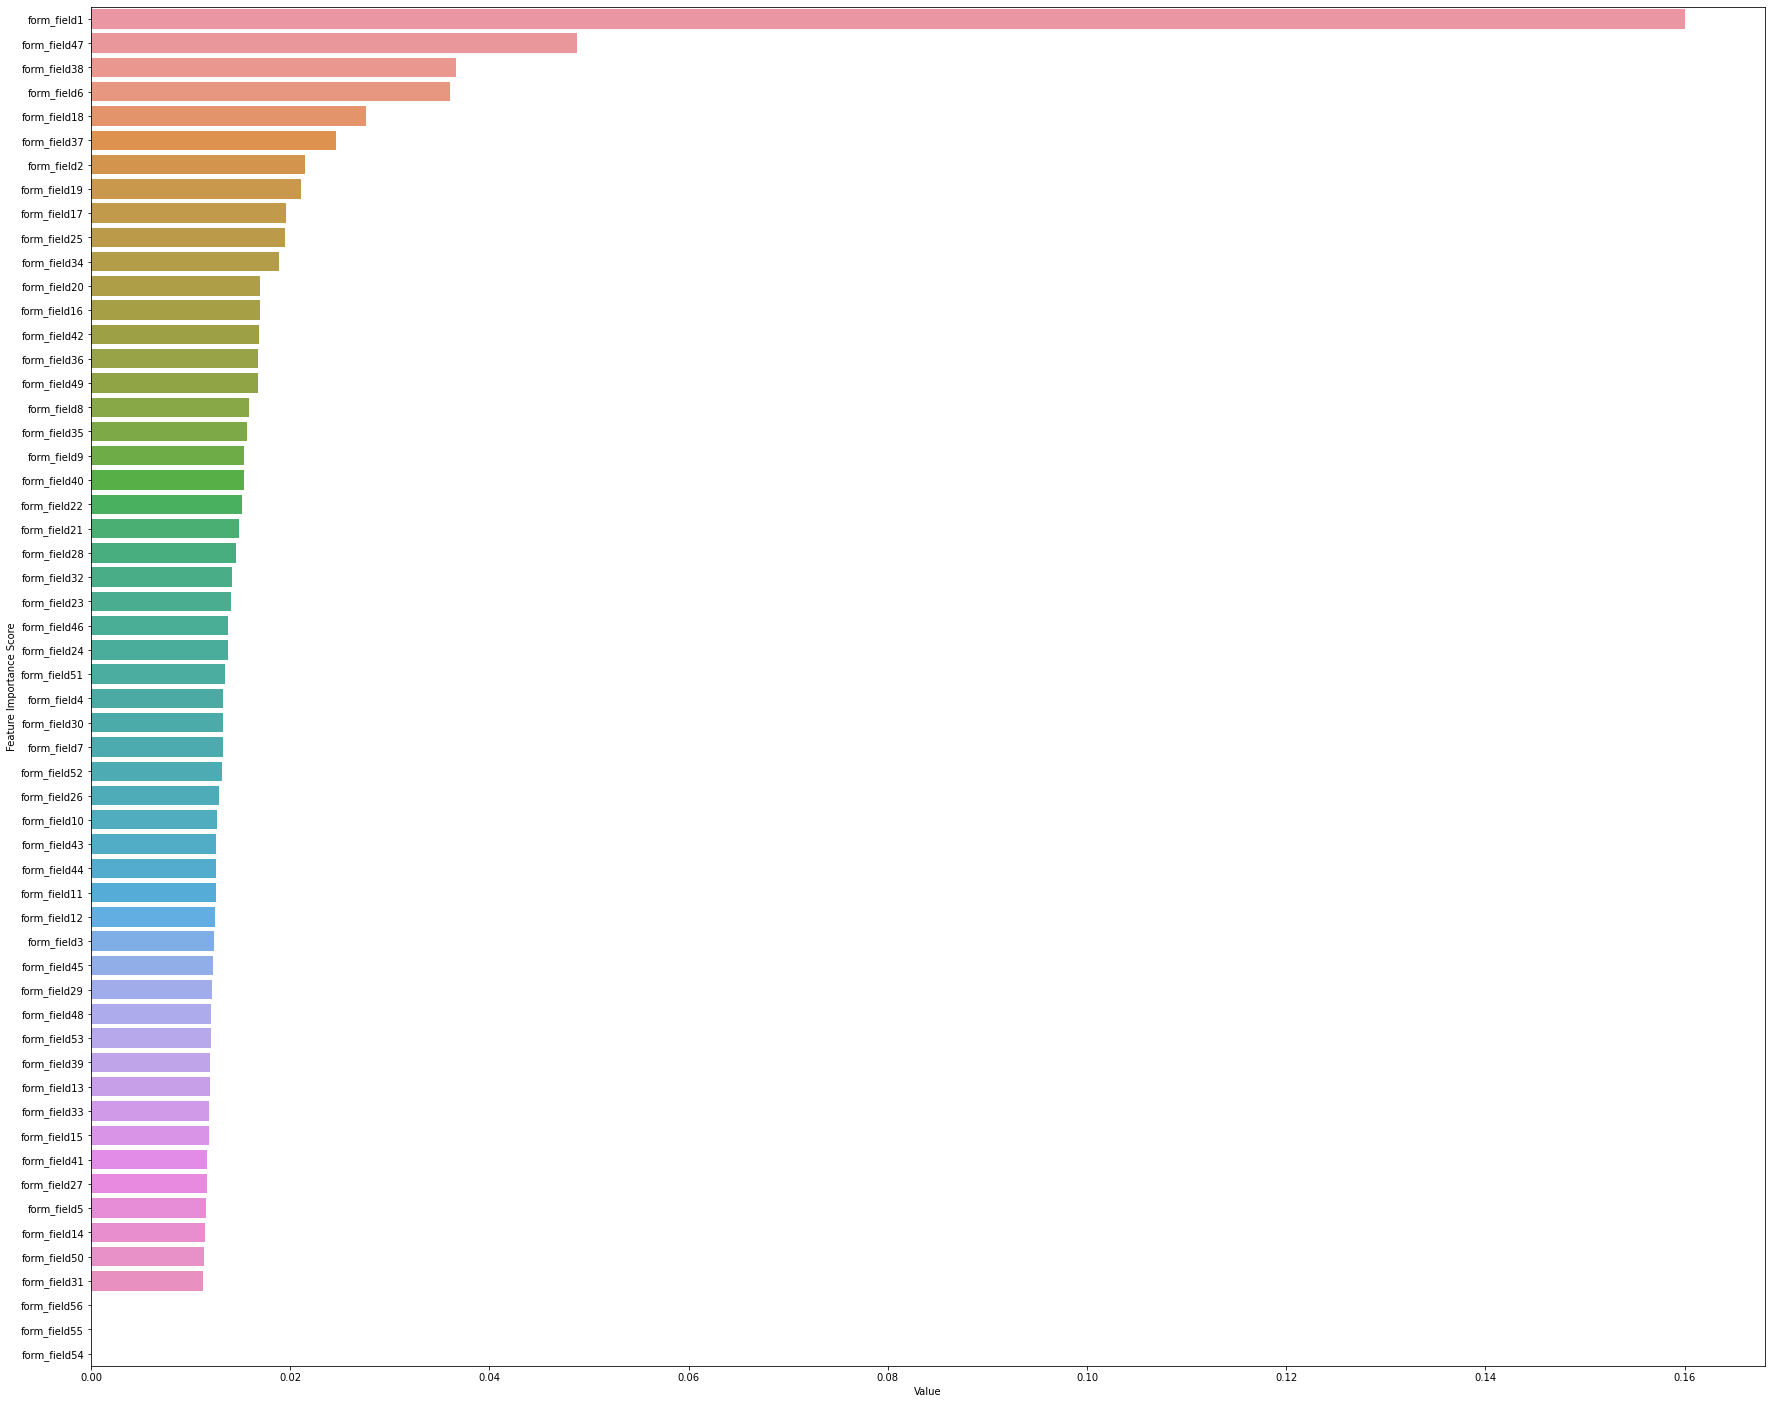

0.8366125070702506 0.9343603261719308 0.0060257493041045215


In [29]:
xgboost = xgb.XGBClassifier(objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=25, 
    gamma=10, 
    n_estimators=500)

func_= func(train, ylabel, test, xgboost, 'xgboost', 600)
val_p4, test_p4, model4 = func_()

================================Fold1====================================
[1]	valid_0's auc: 0.798176
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.803149
[3]	valid_0's auc: 0.806508
[4]	valid_0's auc: 0.811159
[5]	valid_0's auc: 0.813934
[6]	valid_0's auc: 0.816593
[7]	valid_0's auc: 0.817332
[8]	valid_0's auc: 0.818491
[9]	valid_0's auc: 0.820709
[10]	valid_0's auc: 0.821381
[11]	valid_0's auc: 0.821702
[12]	valid_0's auc: 0.822839
[13]	valid_0's auc: 0.823591
[14]	valid_0's auc: 0.824699
[15]	valid_0's auc: 0.825143
[16]	valid_0's auc: 0.825585
[17]	valid_0's auc: 0.826202
[18]	valid_0's auc: 0.826797
[19]	valid_0's auc: 0.82737
[20]	valid_0's auc: 0.827781
[21]	valid_0's auc: 0.828295
[22]	valid_0's auc: 0.828649
[23]	valid_0's auc: 0.829057
[24]	valid_0's auc: 0.82927
[25]	valid_0's auc: 0.829628
[26]	valid_0's auc: 0.829966
[27]	valid_0's auc: 0.830233
[28]	valid_0's auc: 0.830387
[29]	valid_0's auc: 0.830794
[30]	valid_0's auc: 0.831135
[31]	v

[29]	valid_0's auc: 0.835866
[30]	valid_0's auc: 0.836196
[31]	valid_0's auc: 0.83643
[32]	valid_0's auc: 0.836588
[33]	valid_0's auc: 0.836886
[34]	valid_0's auc: 0.836915
[35]	valid_0's auc: 0.837065
[36]	valid_0's auc: 0.837356
[37]	valid_0's auc: 0.837547
[38]	valid_0's auc: 0.837616
[39]	valid_0's auc: 0.837687
[40]	valid_0's auc: 0.837836
[41]	valid_0's auc: 0.837999
[42]	valid_0's auc: 0.838159
[43]	valid_0's auc: 0.83842
[44]	valid_0's auc: 0.838532
[45]	valid_0's auc: 0.838543
[46]	valid_0's auc: 0.838694
[47]	valid_0's auc: 0.838847
[48]	valid_0's auc: 0.839121
[49]	valid_0's auc: 0.83931
[50]	valid_0's auc: 0.839414
[51]	valid_0's auc: 0.839471
[52]	valid_0's auc: 0.839555
[53]	valid_0's auc: 0.839593
[54]	valid_0's auc: 0.839781
[55]	valid_0's auc: 0.839813
[56]	valid_0's auc: 0.839919
[57]	valid_0's auc: 0.839963
[58]	valid_0's auc: 0.840152
[59]	valid_0's auc: 0.840172
[60]	valid_0's auc: 0.840412
[61]	valid_0's auc: 0.84063
[62]	valid_0's auc: 0.840726
[63]	valid_0's auc

[14]	valid_0's auc: 0.837953
[15]	valid_0's auc: 0.838567
[16]	valid_0's auc: 0.838728
[17]	valid_0's auc: 0.839098
[18]	valid_0's auc: 0.839716
[19]	valid_0's auc: 0.84018
[20]	valid_0's auc: 0.840604
[21]	valid_0's auc: 0.841134
[22]	valid_0's auc: 0.841691
[23]	valid_0's auc: 0.841879
[24]	valid_0's auc: 0.8421
[25]	valid_0's auc: 0.842339
[26]	valid_0's auc: 0.842772
[27]	valid_0's auc: 0.842968
[28]	valid_0's auc: 0.843372
[29]	valid_0's auc: 0.843626
[30]	valid_0's auc: 0.844009
[31]	valid_0's auc: 0.844068
[32]	valid_0's auc: 0.844338
[33]	valid_0's auc: 0.844727
[34]	valid_0's auc: 0.844927
[35]	valid_0's auc: 0.844943
[36]	valid_0's auc: 0.84502
[37]	valid_0's auc: 0.845265
[38]	valid_0's auc: 0.84537
[39]	valid_0's auc: 0.845559
[40]	valid_0's auc: 0.845739
[41]	valid_0's auc: 0.845904
[42]	valid_0's auc: 0.845997
[43]	valid_0's auc: 0.846093
[44]	valid_0's auc: 0.846152
[45]	valid_0's auc: 0.846372
[46]	valid_0's auc: 0.846395
[47]	valid_0's auc: 0.84651
[48]	valid_0's auc: 

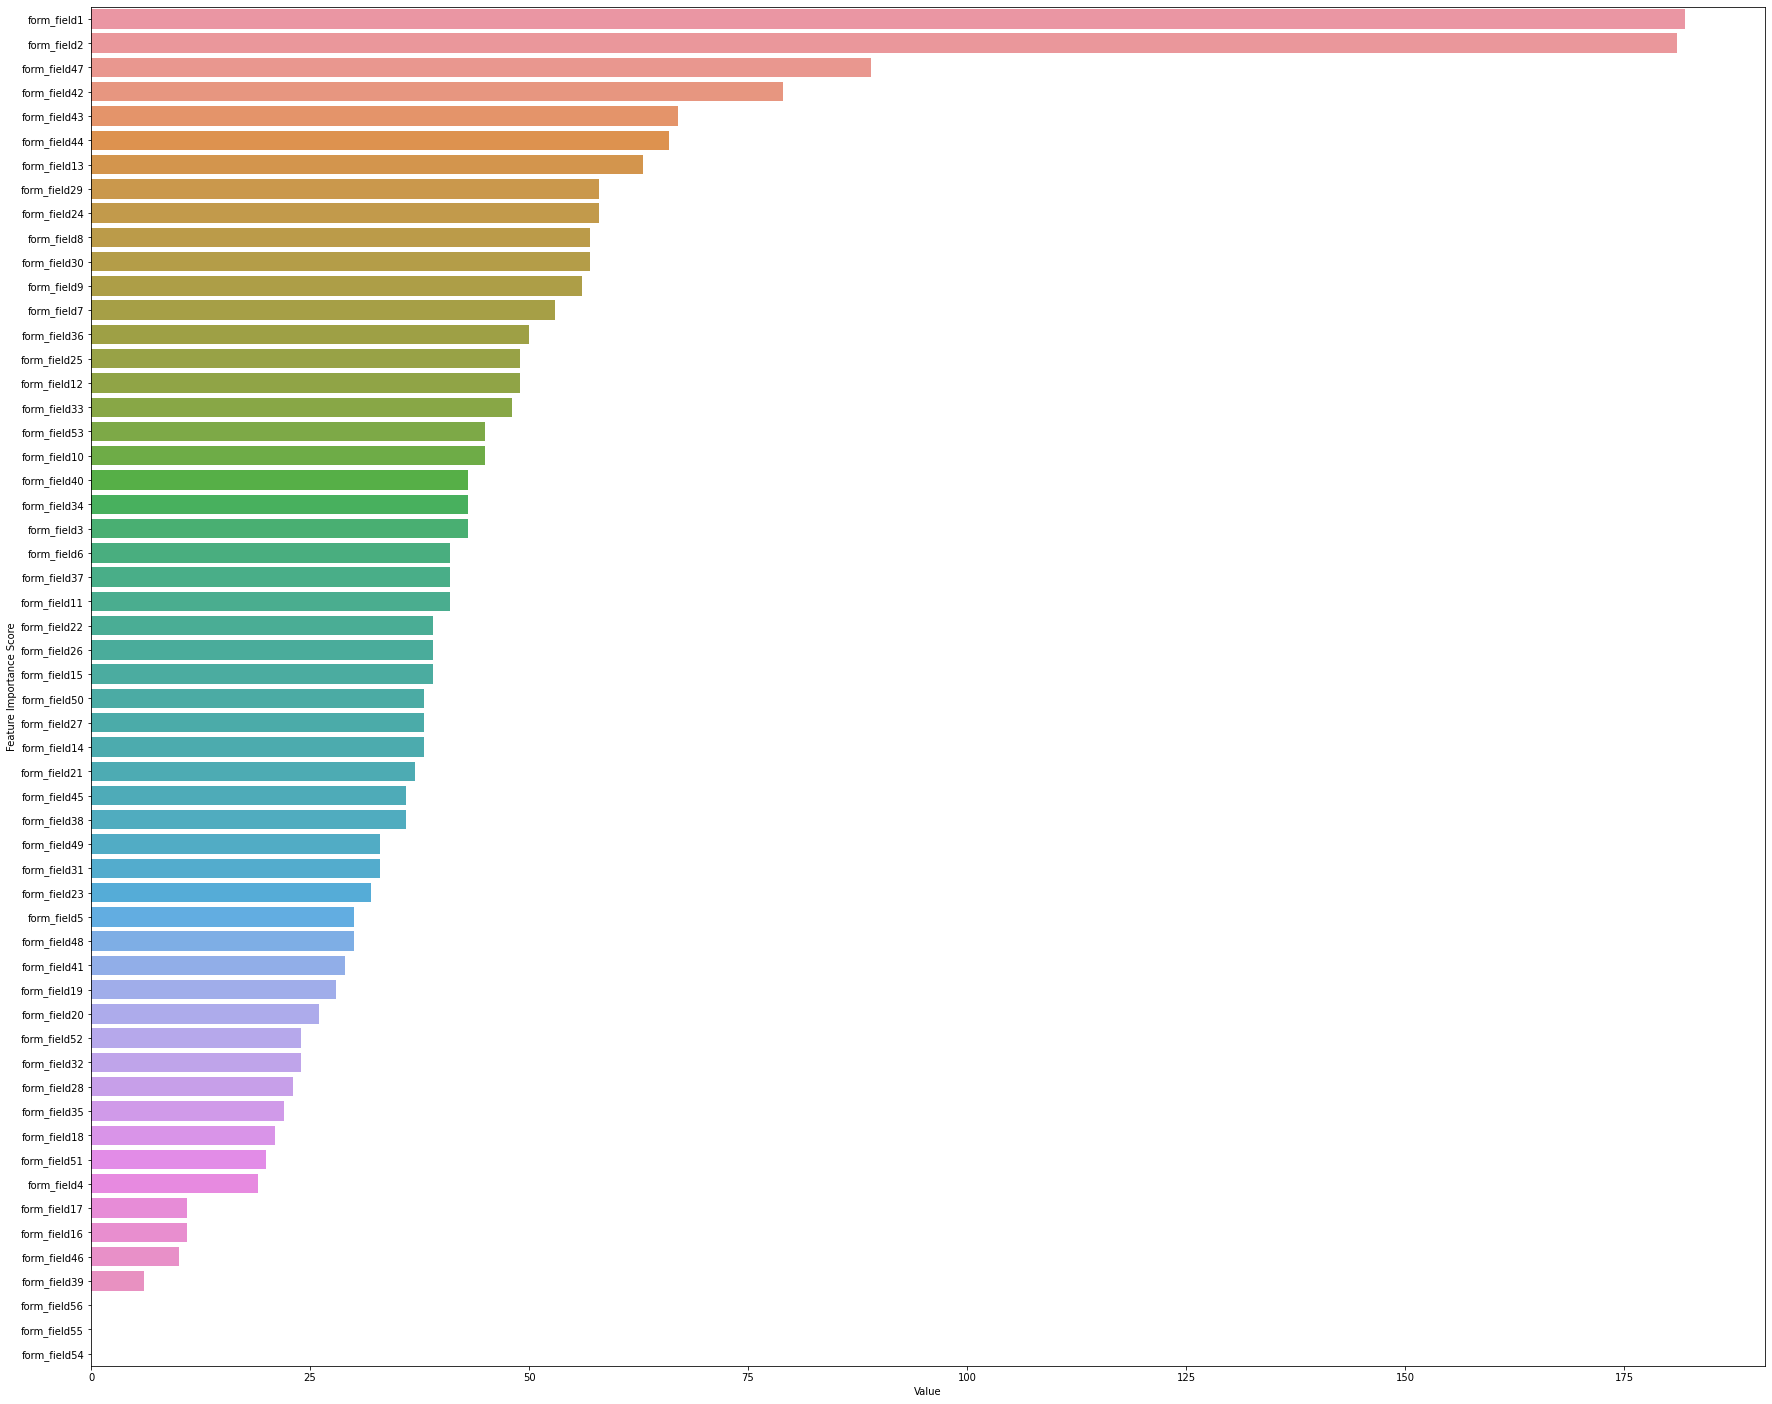

0.8389359204340148 0.8725347656310788 0.005986396067357677


In [30]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(objective =  'binary', 
                            metric= 'auc',
                            boosting_type= 'gbdt',
                            lambda_l1= 0.0004912993970392775,
                            lambda_l2= 9.424350138808432,
                            num_leaves= 25,
                            feature_fraction= 1.0,
                            bagging_fraction= 0.9540416539312312,
                            bagging_freq= 7,
                            min_child_samples= 100, n_estimators = 300)

func_= func(train, ylabel, test, lgb_model, 'lgbm', 1000)
val_p5, test_p5, model5 = func_()

================================Fold1====================================
[1]	valid_0's auc: 0.790597
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.809651
[3]	valid_0's auc: 0.811826
[4]	valid_0's auc: 0.814203
[5]	valid_0's auc: 0.813813
[6]	valid_0's auc: 0.815074
[7]	valid_0's auc: 0.815722
[8]	valid_0's auc: 0.817021
[9]	valid_0's auc: 0.816736
[10]	valid_0's auc: 0.819553
[11]	valid_0's auc: 0.819464
[12]	valid_0's auc: 0.819206
[13]	valid_0's auc: 0.818977
[14]	valid_0's auc: 0.819096
[15]	valid_0's auc: 0.821431
[16]	valid_0's auc: 0.821957
[17]	valid_0's auc: 0.82353
[18]	valid_0's auc: 0.823499
[19]	valid_0's auc: 0.823584
[20]	valid_0's auc: 0.823795
[21]	valid_0's auc: 0.825268
[22]	valid_0's auc: 0.825016
[23]	valid_0's auc: 0.825971
[24]	valid_0's auc: 0.825892
[25]	valid_0's auc: 0.826221
[26]	valid_0's auc: 0.826179
[27]	valid_0's auc: 0.826161
[28]	valid_0's auc: 0.827214
[29]	valid_0's auc: 0.828112
[30]	valid_0's auc: 0.828649
[31]	

[88]	valid_0's auc: 0.833944
[89]	valid_0's auc: 0.833964
[90]	valid_0's auc: 0.83398
[91]	valid_0's auc: 0.833959
[92]	valid_0's auc: 0.834119
[93]	valid_0's auc: 0.83413
[94]	valid_0's auc: 0.83424
[95]	valid_0's auc: 0.834213
[96]	valid_0's auc: 0.834325
[97]	valid_0's auc: 0.834367
[98]	valid_0's auc: 0.834443
[99]	valid_0's auc: 0.834444
[100]	valid_0's auc: 0.834495
[101]	valid_0's auc: 0.83459
[102]	valid_0's auc: 0.834637
[103]	valid_0's auc: 0.834545
[104]	valid_0's auc: 0.834612
[105]	valid_0's auc: 0.834658
[106]	valid_0's auc: 0.834636
[107]	valid_0's auc: 0.834712
[108]	valid_0's auc: 0.83473
[109]	valid_0's auc: 0.834662
[110]	valid_0's auc: 0.834625
[111]	valid_0's auc: 0.834593
[112]	valid_0's auc: 0.834641
[113]	valid_0's auc: 0.834655
[114]	valid_0's auc: 0.834667
[115]	valid_0's auc: 0.834796
[116]	valid_0's auc: 0.834782
[117]	valid_0's auc: 0.834842
[118]	valid_0's auc: 0.834903
[119]	valid_0's auc: 0.834829
[120]	valid_0's auc: 0.834756
[121]	valid_0's auc: 0.8347

[200]	valid_0's auc: 0.840656
[201]	valid_0's auc: 0.840601
[202]	valid_0's auc: 0.840551
[203]	valid_0's auc: 0.840598
[204]	valid_0's auc: 0.840614
[205]	valid_0's auc: 0.840642
[206]	valid_0's auc: 0.840669
[207]	valid_0's auc: 0.840707
[208]	valid_0's auc: 0.840722
[209]	valid_0's auc: 0.840702
[210]	valid_0's auc: 0.840661
[211]	valid_0's auc: 0.840675
[212]	valid_0's auc: 0.840751
[213]	valid_0's auc: 0.840793
[214]	valid_0's auc: 0.840789
[215]	valid_0's auc: 0.840719
[216]	valid_0's auc: 0.840721
[217]	valid_0's auc: 0.840692
[218]	valid_0's auc: 0.840669
[219]	valid_0's auc: 0.840638
[220]	valid_0's auc: 0.840665
Early stopping, best iteration is:
[190]	valid_0's auc: 0.840969

Validation scores 0.840968643629666 0.40499630866440206
Training scores 0.9386396528991359 0.2998938939970431
================================Fold4====================================
[1]	valid_0's auc: 0.79437
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.806814
[3]	

[10]	valid_0's auc: 0.83154
[11]	valid_0's auc: 0.83098
[12]	valid_0's auc: 0.830724
[13]	valid_0's auc: 0.830584
[14]	valid_0's auc: 0.830341
[15]	valid_0's auc: 0.833208
[16]	valid_0's auc: 0.833467
[17]	valid_0's auc: 0.835167
[18]	valid_0's auc: 0.834878
[19]	valid_0's auc: 0.834898
[20]	valid_0's auc: 0.835093
[21]	valid_0's auc: 0.836406
[22]	valid_0's auc: 0.836218
[23]	valid_0's auc: 0.837149
[24]	valid_0's auc: 0.836977
[25]	valid_0's auc: 0.837038
[26]	valid_0's auc: 0.837146
[27]	valid_0's auc: 0.836812
[28]	valid_0's auc: 0.837888
[29]	valid_0's auc: 0.838754
[30]	valid_0's auc: 0.839483
[31]	valid_0's auc: 0.839561
[32]	valid_0's auc: 0.839523
[33]	valid_0's auc: 0.839549
[34]	valid_0's auc: 0.839555
[35]	valid_0's auc: 0.839618
[36]	valid_0's auc: 0.840204
[37]	valid_0's auc: 0.84008
[38]	valid_0's auc: 0.840716
[39]	valid_0's auc: 0.841278
[40]	valid_0's auc: 0.841236
[41]	valid_0's auc: 0.84127
[42]	valid_0's auc: 0.841296
[43]	valid_0's auc: 0.841769
[44]	valid_0's auc

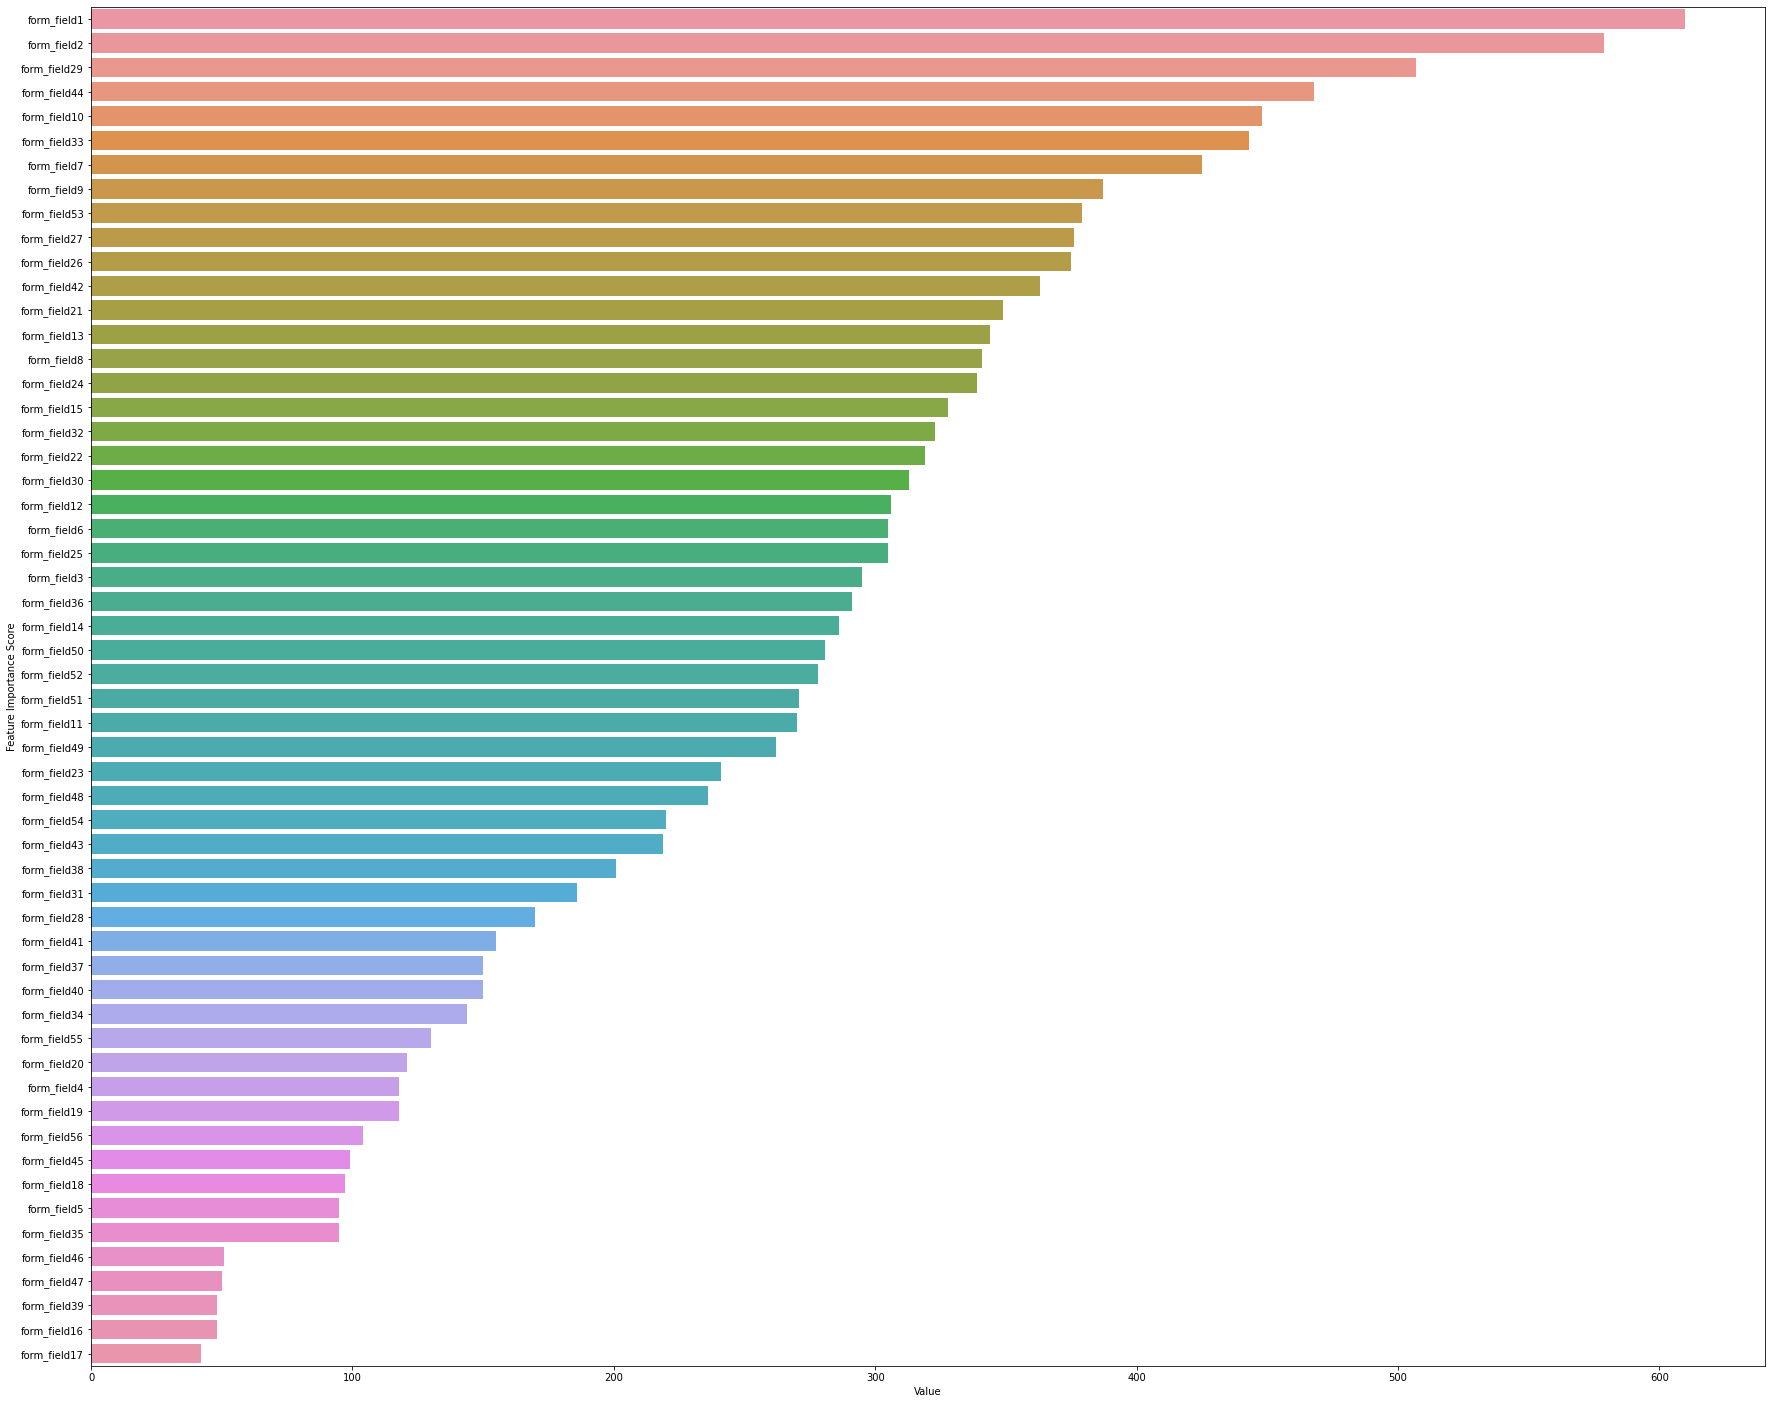

0.8381279385914487 0.9298315067827634 0.00542794155456151


In [31]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(num_leaves= 100,
         min_data_in_leaf= 60, 
        objective =  'binary', 
         max_depth= -1,
         learning_rate= 0.05,
         boosting= "gbdt",
         feature_fraction= 0.35,
         lambda_l1= 1,
         lambda_l2= 1,
         verbosity= -1,
         metric= 'auc',
        num_iterations= 2200,
        min_child_samples= 100, 
        n_estimators = 300)

func_= func(train, ylabel, test, lgb_model, 'lgbm', 600)
val_p6, test_p6, model6 = func_()

In [32]:
from sklearn.linear_model import  LinearRegression, Ridge, Lasso
stack = np.column_stack((val_p1, val_p2, val_p3, val_p4, val_p5, val_p6))
stack_p = np.column_stack((test_p1, test_p2, test_p3, test_p4, test_p5, test_p6))
predict = LinearRegression().fit(stack, ylabel).predict(stack_p)

In [33]:
sample['default_status'] = predict

sample.to_csv('solution_stack4.csv',index=False)